DATA CLEANING

Importy bibliotek

In [193]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2

Wczytanie danych

In [194]:
df = pd.read_csv(os.path.join(os.getcwd(), 'training_sample.csv'))

Analiza struktury danych

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [196]:
pd.set_option('display.max_columns', None)
df.head(3)

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0


In [197]:
# sprawdzenie wartości pustych
df.isna().sum().sum()

0

In [198]:
# sprawdzenie duplikatów
df.duplicated().sum()

0

In [199]:
# sprawdzenie duplikatów dla kol. z indeksem odwiedzającego sklep
df.duplicated(subset=['UserID']).sum()

0

In [200]:
# lub wartości unikalnych
df['UserID'].size == df['UserID'].nunique()

True

Wniosek: odwiedzający sklep to różni użytkownicy - brak powtarzających się

Analiza dystrybucji danych

In [201]:
#px.histogram(data=df, x="total_bill", y="tip", color="sex", marginal="rug", hover_data=df.columns)
#fig.show()

basket_icon_click
0                    0.90085
1                    0.09915
dtype: float64
--------------------------------------
 
basket_add_list
0                  0.925479
1                  0.074521
dtype: float64
--------------------------------------
 
basket_add_detail
0                    0.887084
1                    0.112916
dtype: float64
--------------------------------------
 
sort_by
0          0.963151
1          0.036849
dtype: float64
--------------------------------------
 
image_picker
0               0.973265
1               0.026735
dtype: float64
--------------------------------------
 
account_page_click
0                     0.99643
1                     0.00357
dtype: float64
--------------------------------------
 
promo_banner_click
0                     0.983792
1                     0.016208
dtype: float64
--------------------------------------
 
detail_wishlist_add
0                      0.996489
1                      0.003511
dtype: float64
------------

C:\Users\piotr\AppData\Local\Temp\ipykernel_4856\1707977794.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i, figsize=(12,5))


 
returning_user
1                 0.534915
0                 0.465085
dtype: float64
--------------------------------------
 
loc_uk
1         0.933224
0         0.066776
dtype: float64
--------------------------------------
 
ordered
0          0.958074
1          0.041926
dtype: float64
--------------------------------------
 


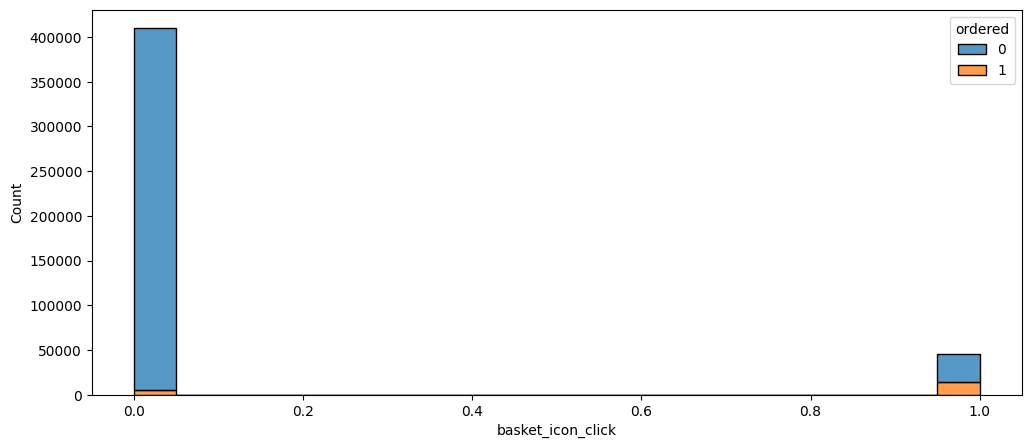

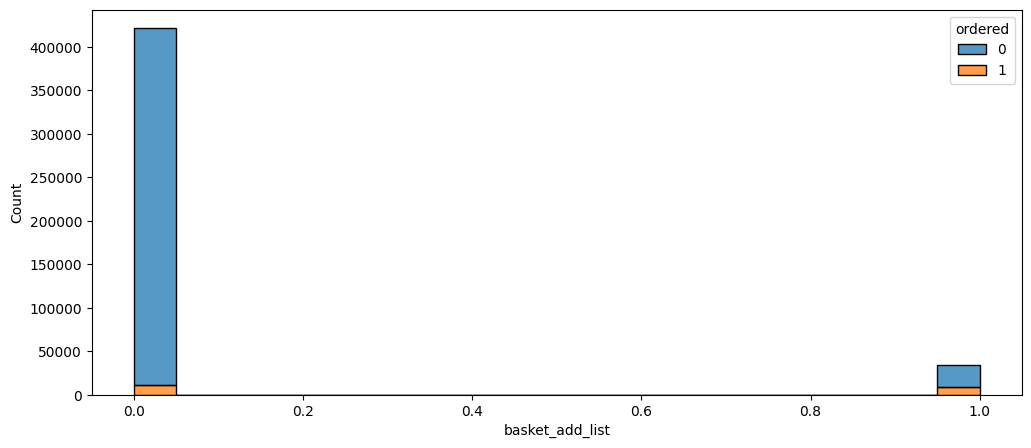

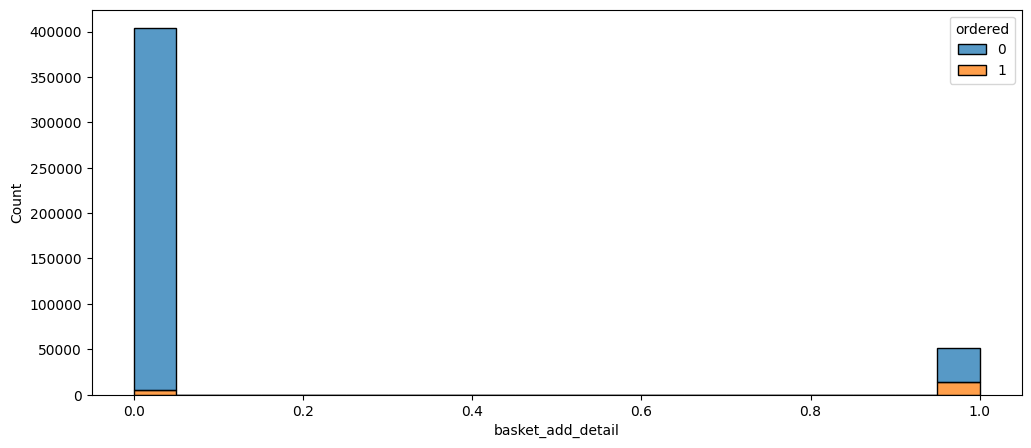

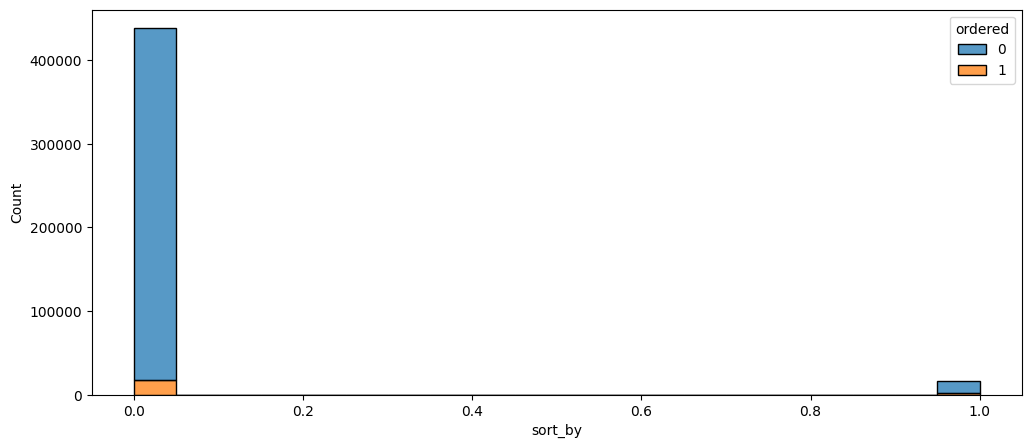

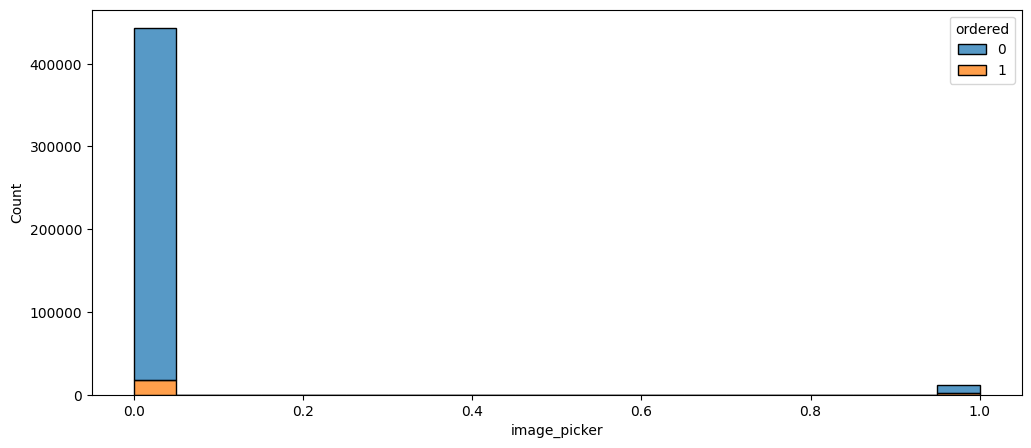

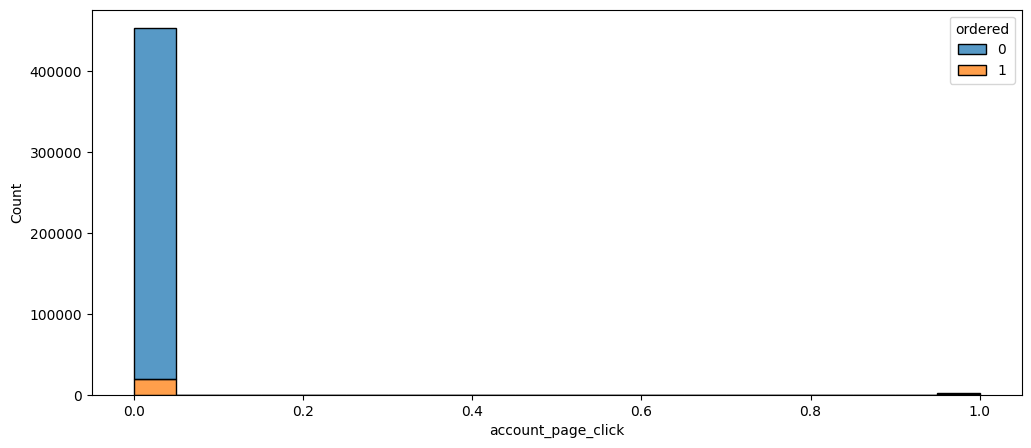

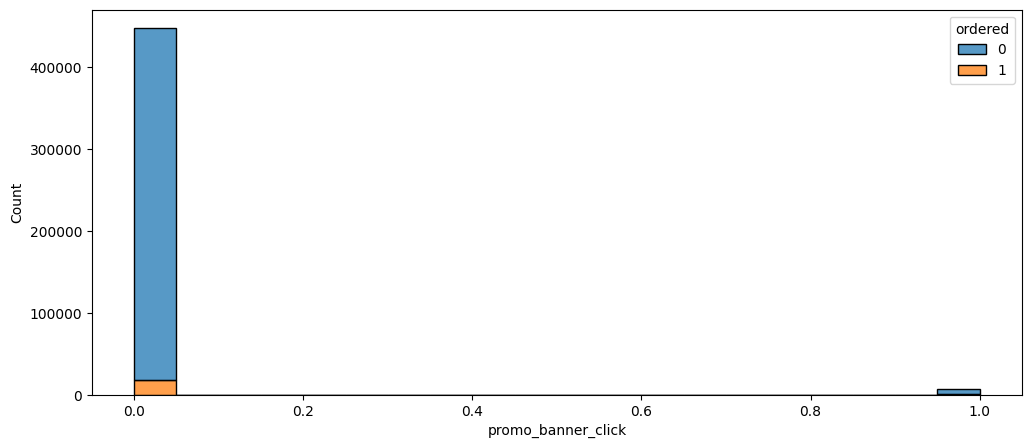

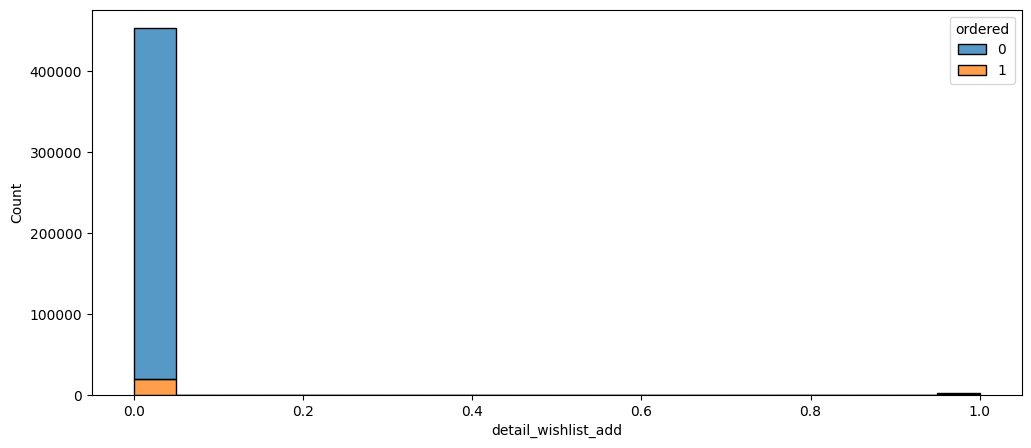

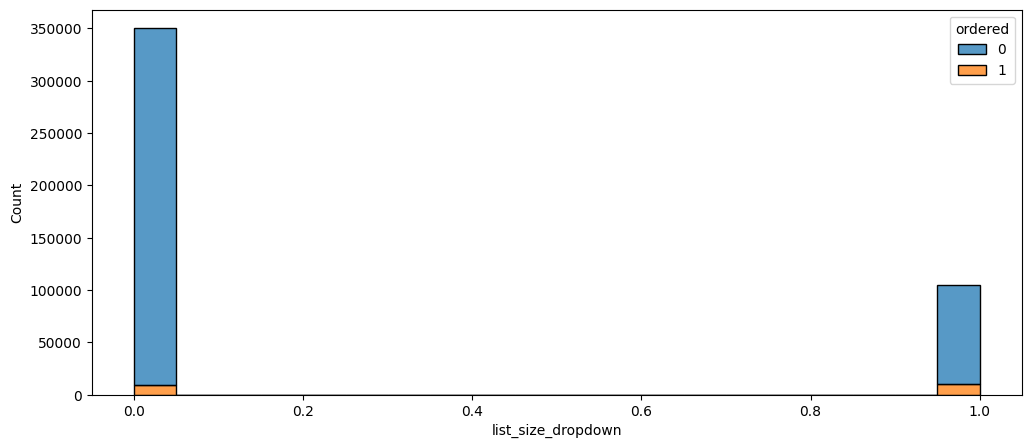

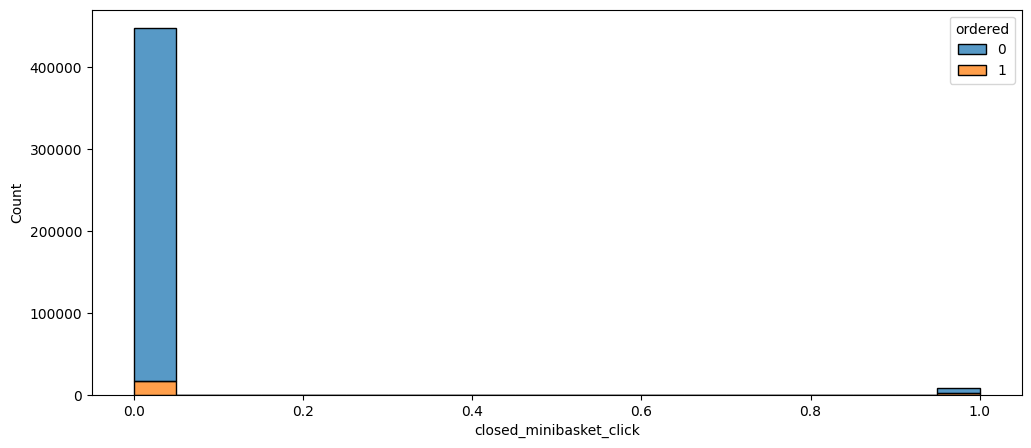

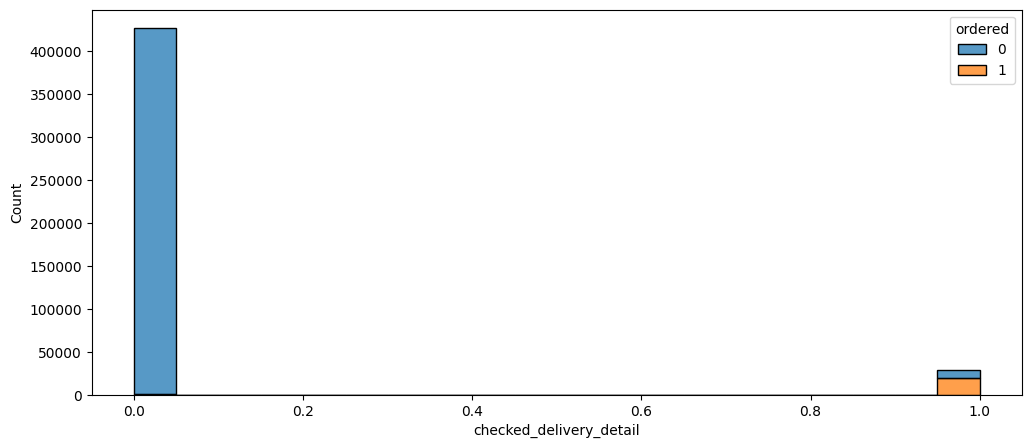

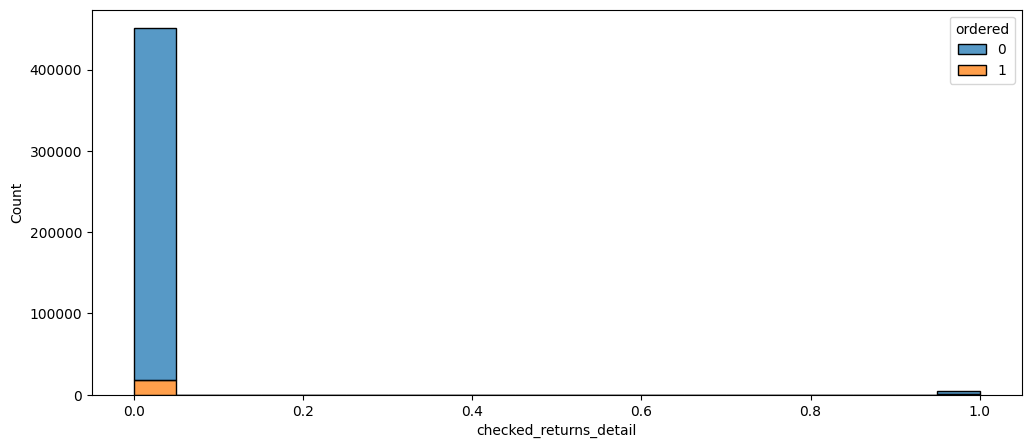

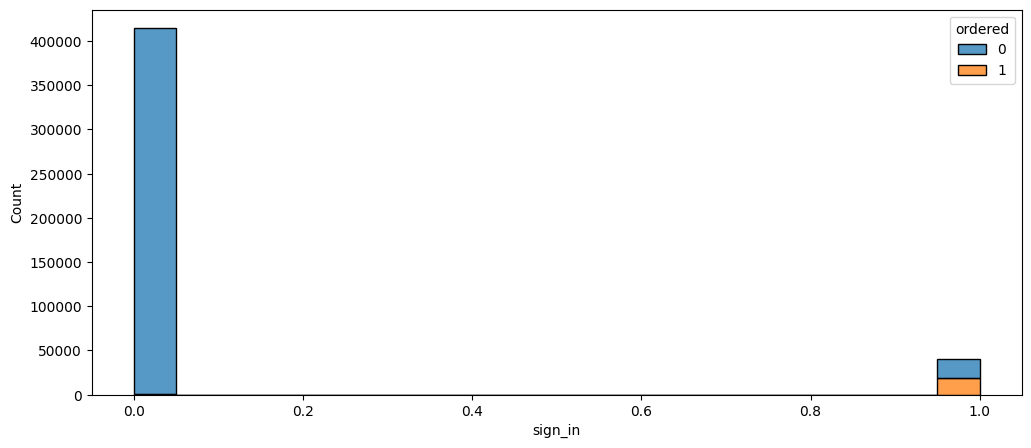

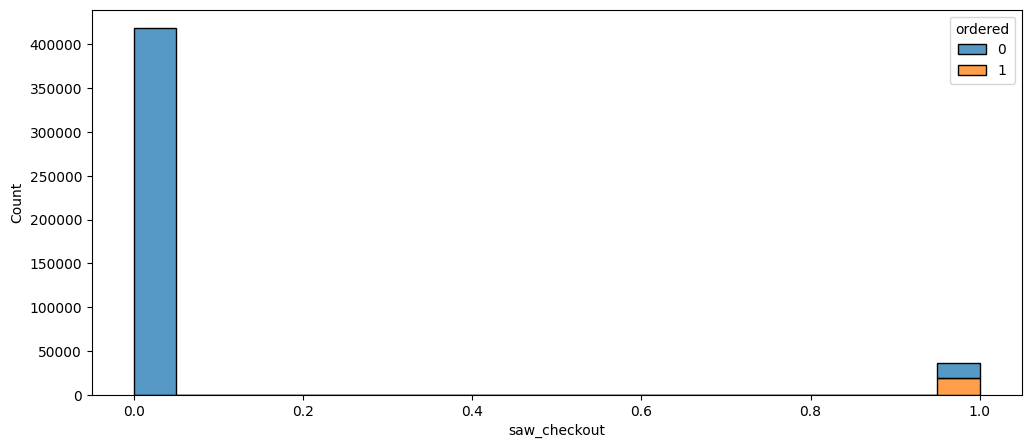

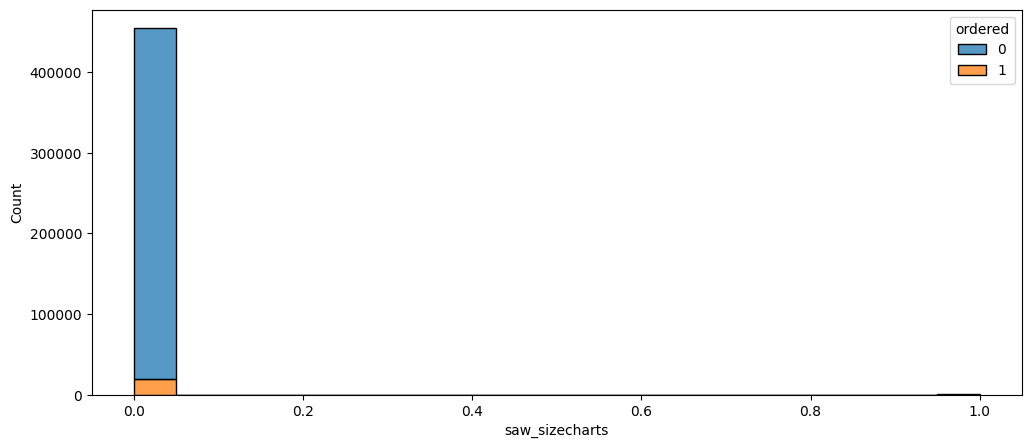

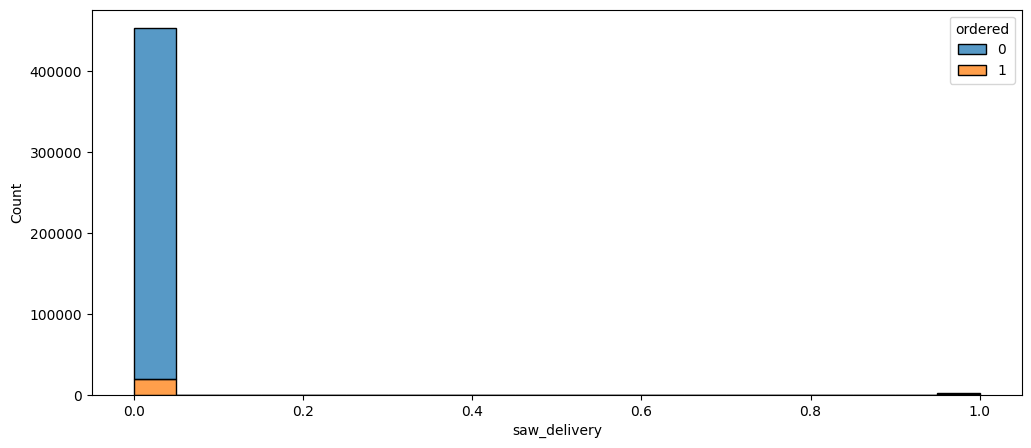

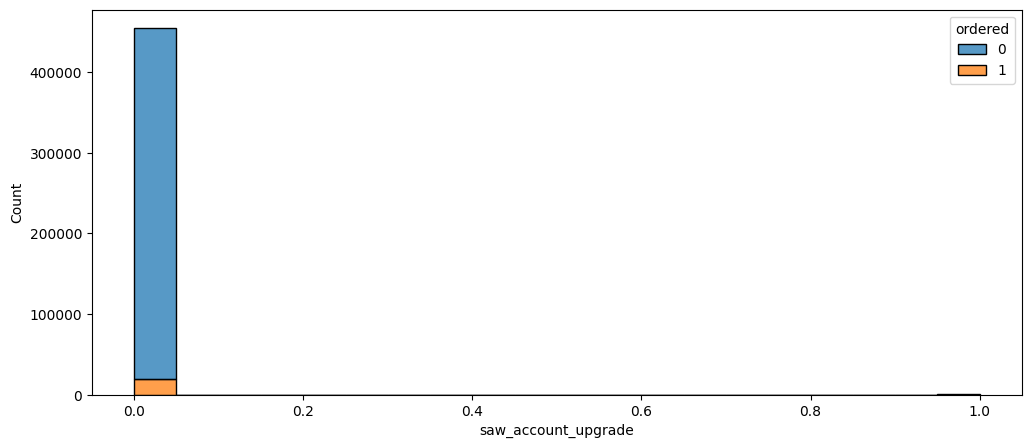

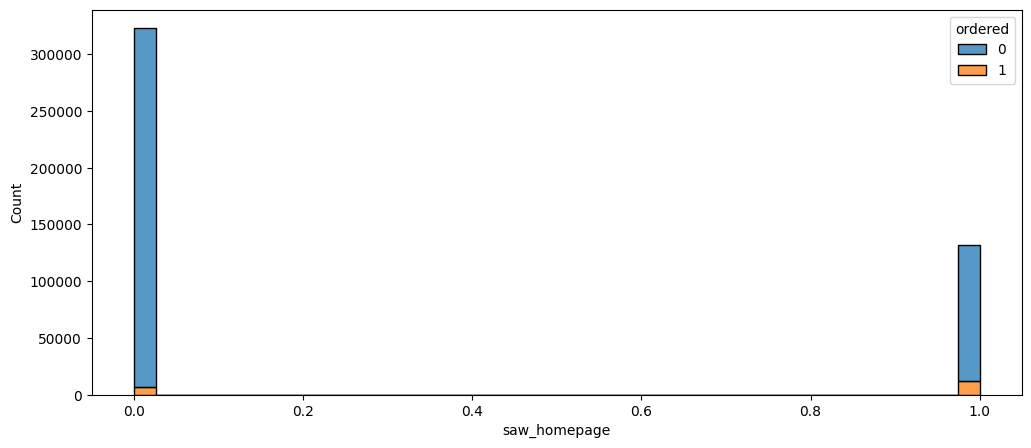

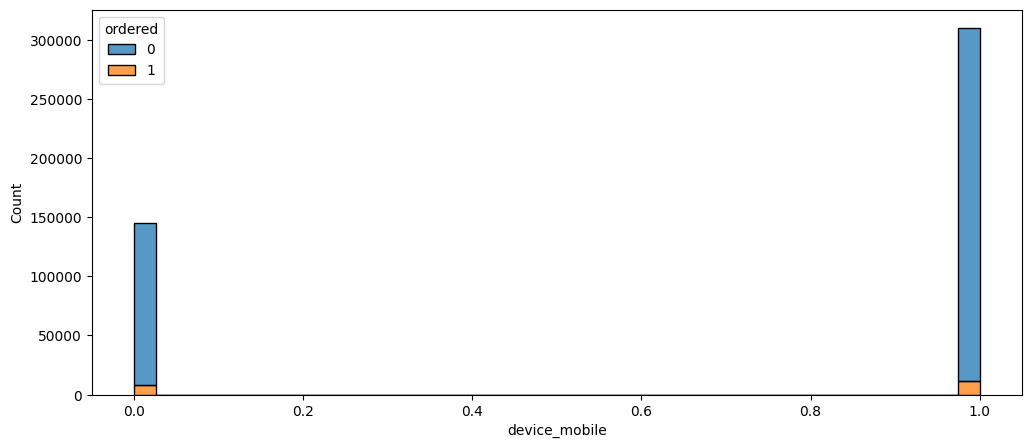

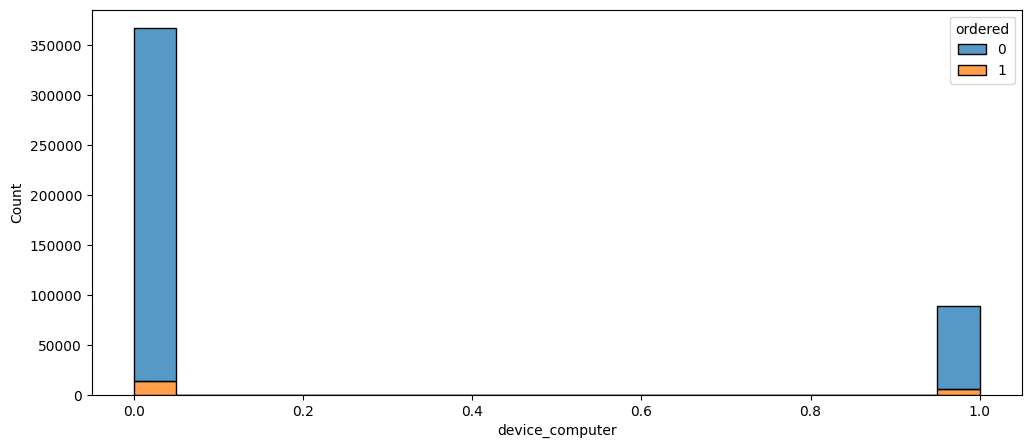

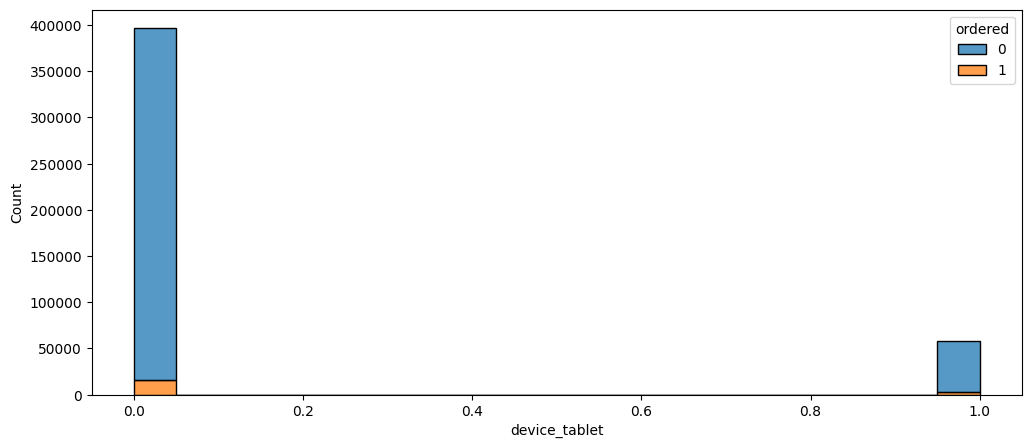

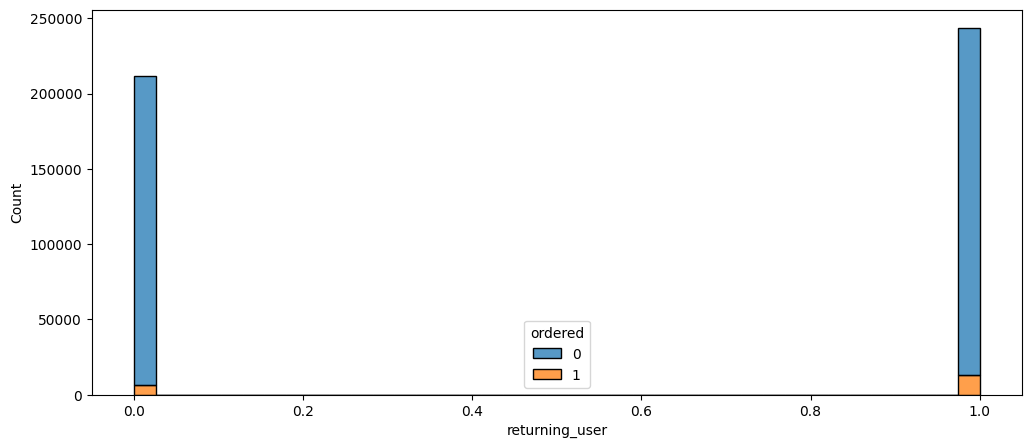

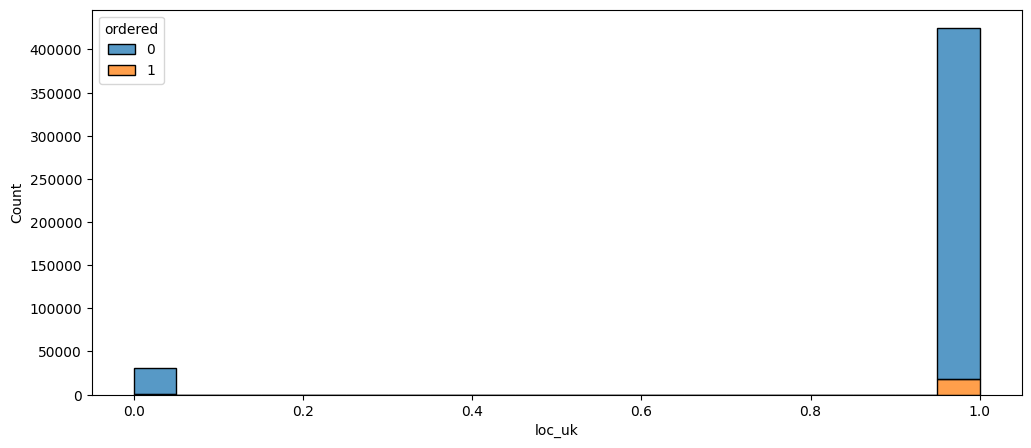

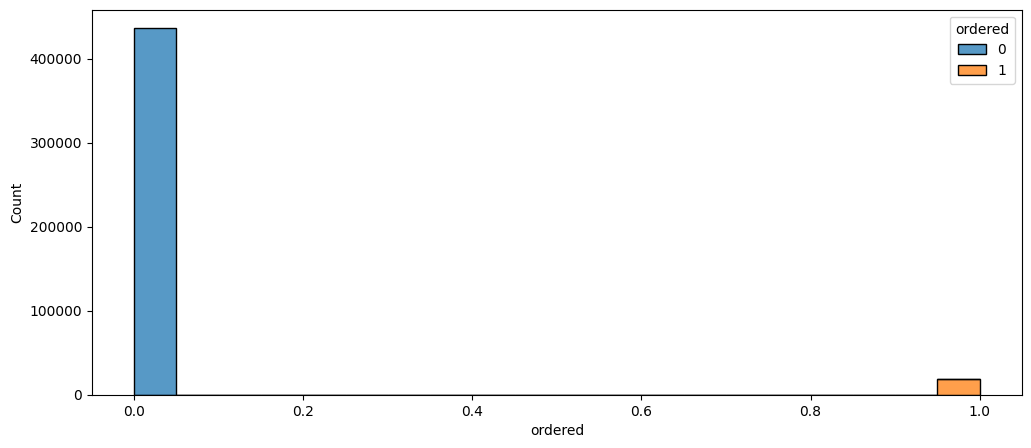

In [202]:
for i, column in enumerate(df.columns[1:]):
    print(df[[column]].value_counts(normalize=True))
    print('--------------------------------------')
    plt.figure(i, figsize=(12,5))
    sns.histplot(data=df, x=df[column], hue='ordered', multiple='stack')
    print(' ')

In [203]:
df['ordered'].value_counts()

0    436308
1     19093
Name: ordered, dtype: int64

Wniosek: Dane kategoryczne-nominalne, niezbalansowany zbiór danych dla zmiennej objaśnianej (95,8% odp. 436 308 odwiedzających sklep nie złożyło zamówienia, a złożyło jedynie 4,2% odp. 19 093 )

Wybór zmiennych objaśniających - wybrałem metodę SelectKBest z testem chi2 na podstawie poniższego rysunku. 
![Wybór zmiennych objaśniających](https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png)

In [204]:
# Podział zbioru na zmienne objaśniające(X) i zmienną objaśnianą-docelową (y)
X = df.drop(['UserID','ordered'], axis=1)
y = df['ordered']

In [205]:
# Wybór zmiennych objaśniających mających największy wpływ na zmienną docelową za pomocą testu chi2
fs = SelectKBest(score_func=chi2, k='all').fit(X,y)
pd.DataFrame({'Score': fs.scores_}, index=X.columns).sort_values('Score',ascending=False)

,Score
checked_delivery_detail,272258.524257
saw_checkout,210579.576765
sign_in,183811.193635
basket_icon_click,75268.255659
basket_add_detail,69380.842385
basket_add_list,34876.818403
closed_minibasket_click,8773.075521
list_size_dropdown,8406.176136
saw_homepage,8048.758625
image_picker,2265.379867


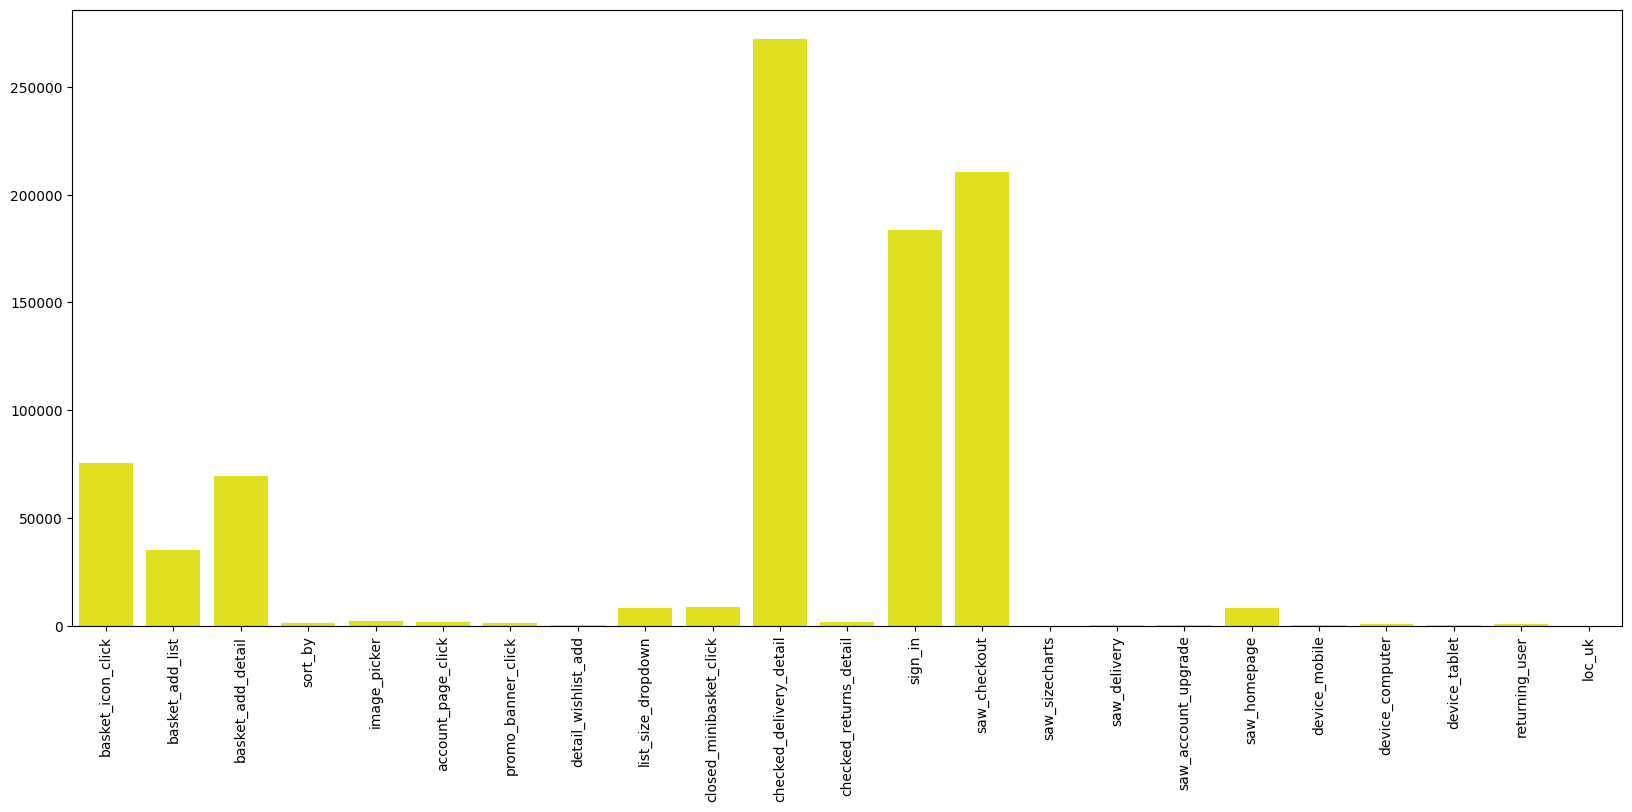

In [206]:
# Prezentacja wyników na wykresie
plt.figure(figsize=(20,8))
sns.barplot(x=X.columns, y=fs.scores_, color='yellow')
plt.xticks(rotation='vertical')
plt.show()

WNIOSEK: Największy wpływ na zmienną docelową ma 9 poniższych zdarzeń: 
- checked_delivery_detail
- saw_checkout
- sign_in
- basket_icon_click
- basket_add_detail
- basket_add_list
- closed_minibasket_click
- list_size_dropdown
- saw_homepage

In [207]:
X.columns

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk'],
      dtype='object')

In [208]:
# Biorąc pod uwagę powyższy wniosek usuwam ze zbioru danych pozostałe kolumny
X.drop(['sort_by', 'image_picker', 'account_page_click', 'promo_banner_click', 'detail_wishlist_add',
        'checked_returns_detail', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade', 
        'device_mobile', 'device_computer', 'device_tablet', 'returning_user' ,
        'loc_uk'],axis=1, inplace=True)

In [209]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   basket_icon_click        455401 non-null  int64
 1   basket_add_list          455401 non-null  int64
 2   basket_add_detail        455401 non-null  int64
 3   list_size_dropdown       455401 non-null  int64
 4   closed_minibasket_click  455401 non-null  int64
 5   checked_delivery_detail  455401 non-null  int64
 6   sign_in                  455401 non-null  int64
 7   saw_checkout             455401 non-null  int64
 8   saw_homepage             455401 non-null  int64
dtypes: int64(9)
memory usage: 31.3 MB


In [210]:
# Połączenie zbioru X z y oraz zapis do pliku
clean_train_data = pd.concat([X,y],axis=1)
clean_train_data.head()

,basket_icon_click,basket_add_list,basket_add_detail,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,sign_in,saw_checkout,saw_homepage,ordered
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,1,1,1,1,1


In [211]:
clean_train_data.to_csv('clean_dataset.csv')